OBJECTIVE IS TO DIAGNOSTICALLY PREDICT WHETHER OR NOT A PATIENT HAS DIABETES

#Classification Problem : Binary Logistic Regression
#Target variable : Label

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [2]:
#index_col = "insulin"
column_names = ['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
data_set = pd.read_csv("I:/Jupyter Programs/diabetes.csv", header=None, names=column_names, skiprows=(0,0))

In [3]:
data_set.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregnant    768 non-null int64
glucose     768 non-null int64
bp          768 non-null int64
skin        768 non-null int64
insulin     768 non-null int64
bmi         768 non-null float64
pedigree    768 non-null float64
age         768 non-null int64
label       768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data_set.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#Conversion of string into numeric
convert_col = ['pregnant','insulin','bmi','age','glucose','bp','pedigree']
for col in convert_col: 
    data_set[col] = pd.to_numeric(data_set[col])

In [7]:
features_Columns = ['pregnant','insulin','bmi','age','glucose','bp','pedigree']
X = data_set[features_Columns]
Y = data_set.label

In [8]:
#Correlation Plot
corr = data_set.corr()
plt.figure(figsize=(40,30))

<Figure size 2880x2160 with 0 Axes>

<Figure size 2880x2160 with 0 Axes>

Text(0.5, 15.0, 'Feature Values on X axis')

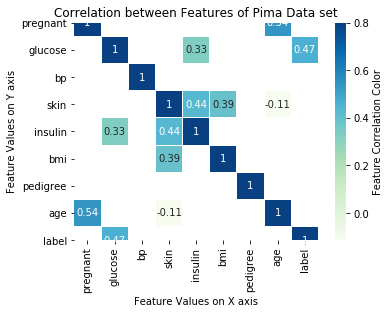

In [9]:
coor_range = corr[(corr >= 0.3) | (corr <= -0.1)]
sns.heatmap(coor_range, vmax=.8, linewidths=0.01, square=True, annot=True, cmap='GnBu', linecolor="white", cbar_kws={'label': 'Feature Correlation Color'})
plt.title('Correlation between Features of Pima Data set')
plt.ylabel("Feature Values on Y axis")
plt.xlabel("Feature Values on X axis")

In [11]:
#test and train
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.20, random_state=42)

In [12]:
logistic_function = LogisticRegression()

In [13]:
#Fit the model with the training data
logistic_function.fit(X_train, Y_train)
Y_prediction = logistic_function.predict(X_test)

C:\new\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [14]:
from sklearn import metrics

cnf_matrix_evaluation = metrics.confusion_matrix(Y_test, Y_prediction)
cnf_matrix_evaluation

array([[84, 15],
       [21, 34]], dtype=int64)

In [15]:
#Confusion matrix using heatmap
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

([<matplotlib.axis.YTick at 0x25d37dd5988>],
 <a list of 1 Text yticklabel objects>)

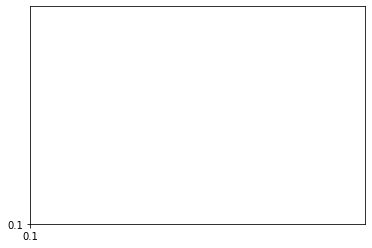

In [16]:
class_names = [0.1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

Text(0.5, 15.0, 'Predicted label')

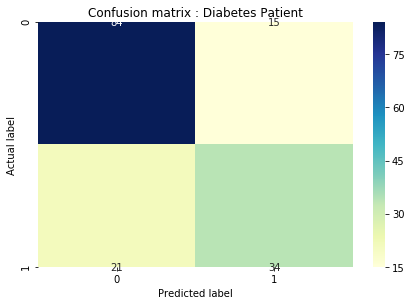

In [19]:
#Creating the heatmap for getting the confusion matrix
sns.heatmap(pd.DataFrame(cnf_matrix_evaluation), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix : Diabetes Patient", y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [20]:
#Confusion Matrix conclusion for the evaluation metrics
print("Accuracy: ", metrics.accuracy_score(Y_test, Y_prediction))
print("Precision: ", metrics.precision_score(Y_test, Y_prediction))
print("Recall: ", metrics.recall_score(Y_test, Y_prediction))
print(metrics.accuracy_score(Y_test, Y_prediction)*100, "% :", "chances that person having diabetes in the present dataset")
print(Y_prediction)

Accuracy:  0.7662337662337663
Precision:  0.6938775510204082
Recall:  0.6181818181818182
76.62337662337663 % : chances that person having diabetes in the present dataset
[0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1
 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0]


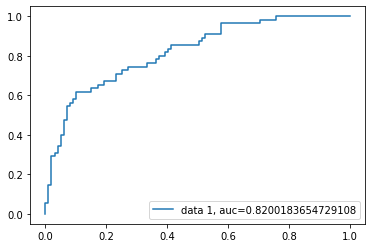

In [22]:
Y_prediction_probability = logistic_function.predict_proba(X_test)[::,1]
fpr , tpr, _ = metrics.roc_curve(Y_test, Y_prediction_probability)
auc = metrics.roc_auc_score(Y_test, Y_prediction_probability)
plt.plot(fpr,tpr,label="data 1, auc=" + str(auc))
plt.legend(loc=4)
plt.show()

In [23]:
from sklearn.metrics import f1_score
f1_score(Y_test, Y_prediction, average=None)

array([0.82352941, 0.65384615])